In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import tools
import importlib
importlib.reload(tools)

<module 'tools' from '/home/eliska/evolution/code/tools.py'>

In [2]:
morphotopes = gpd.read_parquet('/data/uscuni-evolution/all_joined_es.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
154261_8_36,"MULTIPOLYGON (((1789241.062 949382.272, 178924...",False,1,2,4,6,9,19,39,195,...,0.759629,0.914997,0.539197,20.036945,2.971040,2.971040,1605.328009,397.015570,1.0,127882.778479
154261_8_15,"MULTIPOLYGON (((1791357.734 950171.017, 179134...",False,1,2,5,8,12,24,49,337,...,0.590045,0.889519,0.516493,15.857084,2.232566,2.232566,65.587205,86.590409,1.0,4916.183878
154261_8_43,"MULTIPOLYGON (((1790727.323 950061.979, 179071...",False,1,2,4,6,9,19,39,117,...,0.762957,0.769257,0.519012,21.063154,2.505593,2.505593,122.162041,164.151911,1.0,7038.301487
154261_8_44,"MULTIPOLYGON (((1790282.906 949980.539, 179028...",False,1,2,5,8,12,23,47,88,...,0.777555,0.914812,0.576181,19.852994,3.199170,3.199170,239.851597,105.721956,1.0,11586.979732
154261_8_12,"MULTIPOLYGON (((1790098.677 950107.553, 179009...",False,2,4,7,12,18,40,75,139,...,0.745158,0.731604,0.633084,19.051113,2.523666,2.523666,62.511889,475.682975,1.0,2467.937565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3386_0,"MULTIPOLYGON (((3187951.949 2296756.088, 31879...",False,2,4,8,17,25,56,107,122,...,0.426940,0.873167,0.396421,37.267361,4.245372,4.245372,82.796284,66.890818,1.0,16195.180303
203563_3354_0,"MULTIPOLYGON (((3191244.215 2295952.134, 31912...",False,1,2,5,8,13,29,60,80,...,0.659152,0.820535,0.438996,27.924375,3.423645,3.423645,104.125130,85.447676,1.0,7156.151167
203563_3381_0,"MULTIPOLYGON (((3185087.668 2292981.736, 31850...",False,2,4,7,13,20,47,87,87,...,0.649014,0.733694,0.409142,34.758868,3.526355,3.526355,64.184792,71.947088,1.0,5635.600224


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '(1690, 1700]'),
  Text(1, 0, '(1700, 1710]'),
  Text(2, 0, '(1710, 1720]'),
  Text(3, 0, '(1740, 1750]'),
  Text(4, 0, '(1750, 1760]'),
  Text(5, 0, '(1760, 1770]'),
  Text(6, 0, '(1770, 1780]'),
  Text(7, 0, '(1780, 1790]'),
  Text(8, 0, '(1790, 1800]'),
  Text(9, 0, '(1800, 1810]'),
  Text(10, 0, '(1810, 1820]'),
  Text(11, 0, '(1820, 1830]'),
  Text(12, 0, '(1830, 1840]'),
  Text(13, 0, '(1840, 1850]'),
  Text(14, 0, '(1850, 1860]'),
  Text(15, 0, '(1860, 1870]'),
  Text(16, 0, '(1870, 1880]'),
  Text(17, 0, '(1880, 1890]'),
  Text(18, 0, '(1890, 1900]'),
  Text(19, 0, '(1900, 1910]'),
  Text(20, 0, '(1910, 1920]'),
  Text(21, 0, '(1920, 1930]'),
  Text(22, 0, '(1930, 1940]'),
  Text(23, 0, '(1940, 1950]'),
  Text(24, 0, '(1950, 1960]'),
  Text(25, 0, '(1960, 1970]'),
  Text(26, 0, '(1970,

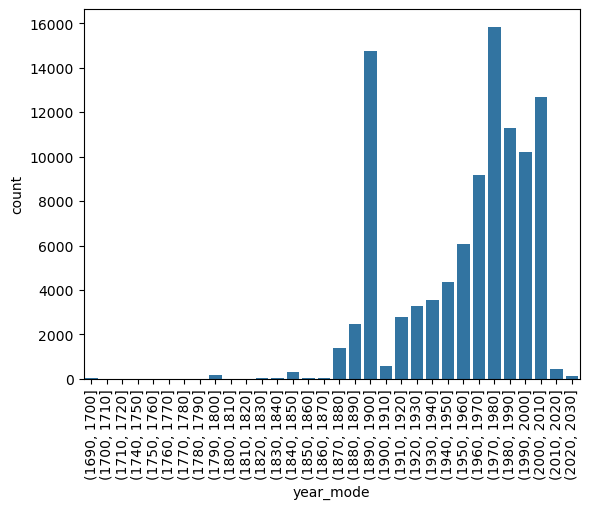

In [3]:
sns.countplot(x='year_mode', data=morphotopes, order=sorted(morphotopes["year_mode"].unique())  # alphabetical order
)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

In [10]:
pivot3 = tools.pivot_tbl(morphotopes,3)
pivot3.to_csv("tables/proportions3_es.csv")

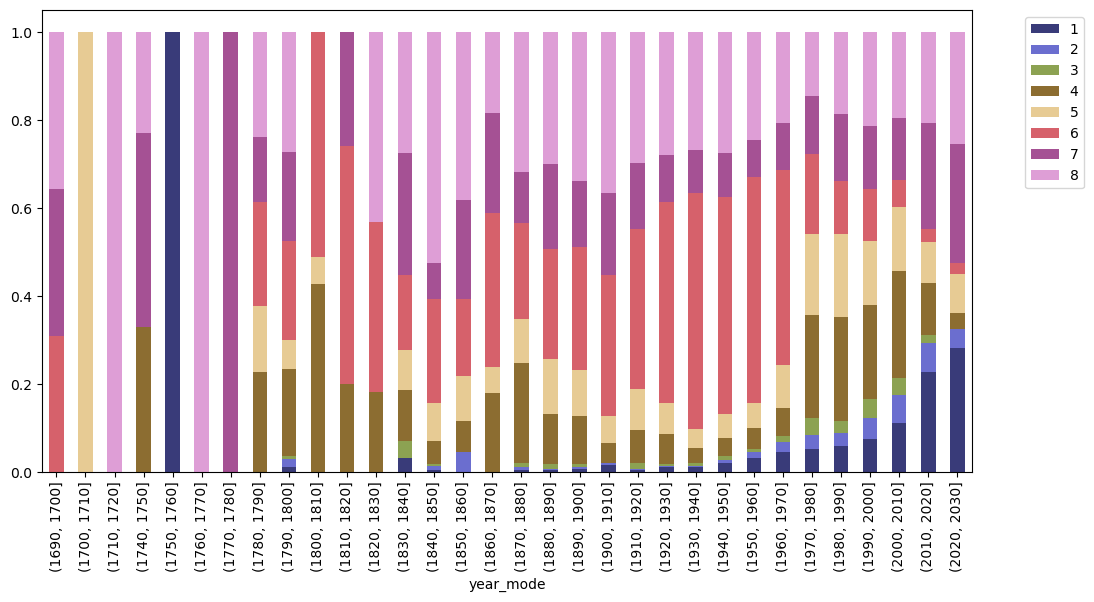

In [5]:
tools.hist(pivot3)

In [ ]:
def hist (table: pd.DataFrame): 
    n_categories = len(table.columns)
    cmap = cm.get_cmap("tab20b", n_categories)  # can also try "tab20c", "tab20", "hsv"
    colors = [cmap(i) for i in range(n_categories)]
    table.plot(kind="bar", stacked=True, color=colors, figsize=(12,6))
    plt.legend(bbox_to_anchor=(1.05, 1))

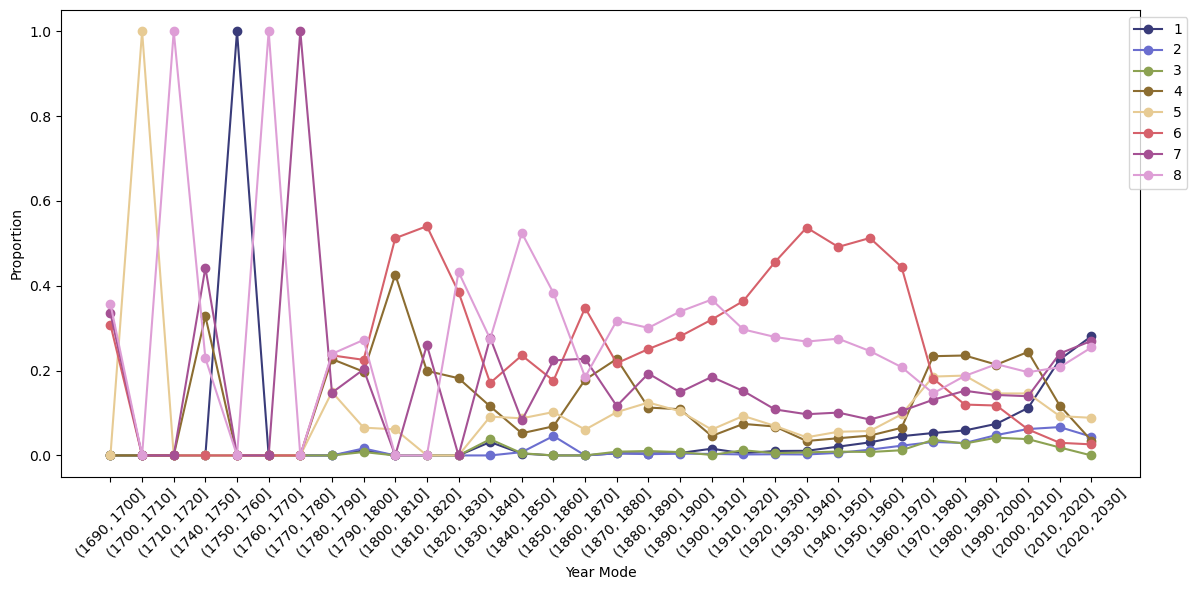

In [6]:
tools.line_plot(pivot3)

In [7]:
pivot3_cum = tools.pivot_tbl_cum(morphotopes,3)
pivot3_cum

level_3_label,1,2,3,4,5,6,7,8
year_mode,,,,,,,,
"(1690, 1700]",0.000000,0.000000,0.000000,0.000000,0.000000,0.308217,0.335100,0.356683
"(1700, 1710]",0.000000,0.000000,0.000000,0.000000,0.042769,0.295034,0.320768,0.341428
"(1710, 1720]",0.000000,0.000000,0.000000,0.000000,0.041273,0.284715,0.309549,0.364463
"(1740, 1750]",0.000000,0.000000,0.000000,0.044974,0.035617,0.245699,0.327800,0.345910
"(1750, 1760]",0.024153,0.000000,0.000000,0.043888,0.034757,0.239764,0.319882,0.337555
"(1760, 1770]",0.023482,0.000000,0.000000,0.042669,0.033792,0.233104,0.310997,0.355956
"(1770, 1780]",0.022982,0.000000,0.000000,0.041760,0.033072,0.228139,0.325673,0.348374
"(1780, 1790]",0.019826,0.000000,0.000000,0.067215,0.049081,0.229207,0.301257,0.333414
"(1790, 1800]",0.013149,0.014080,0.006843,0.178138,0.063093,0.225932,0.217369,0.281394


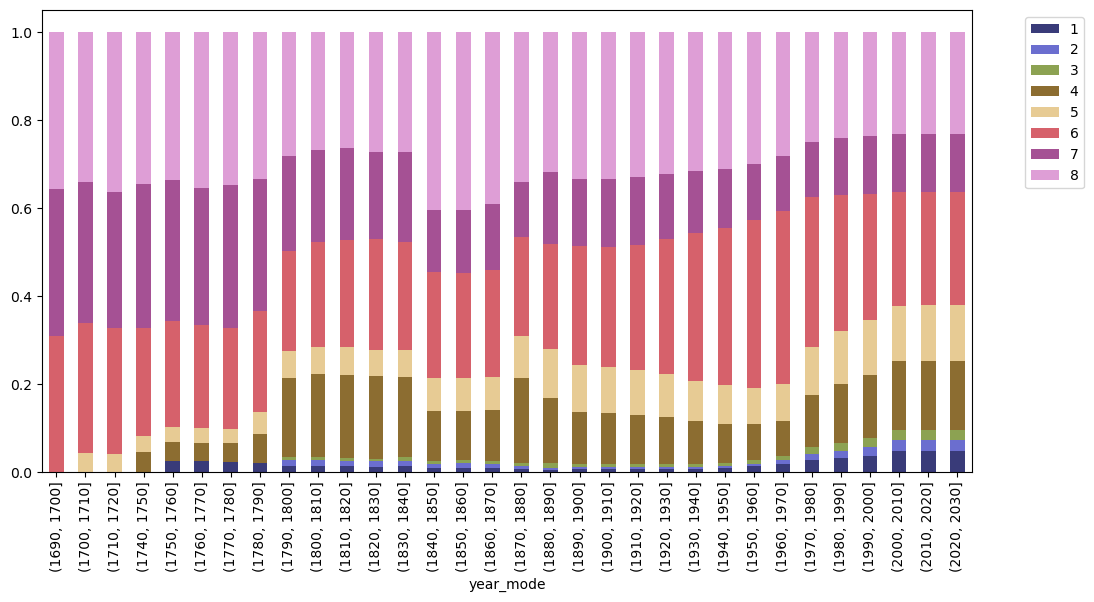

In [8]:
tools.hist(pivot3_cum)

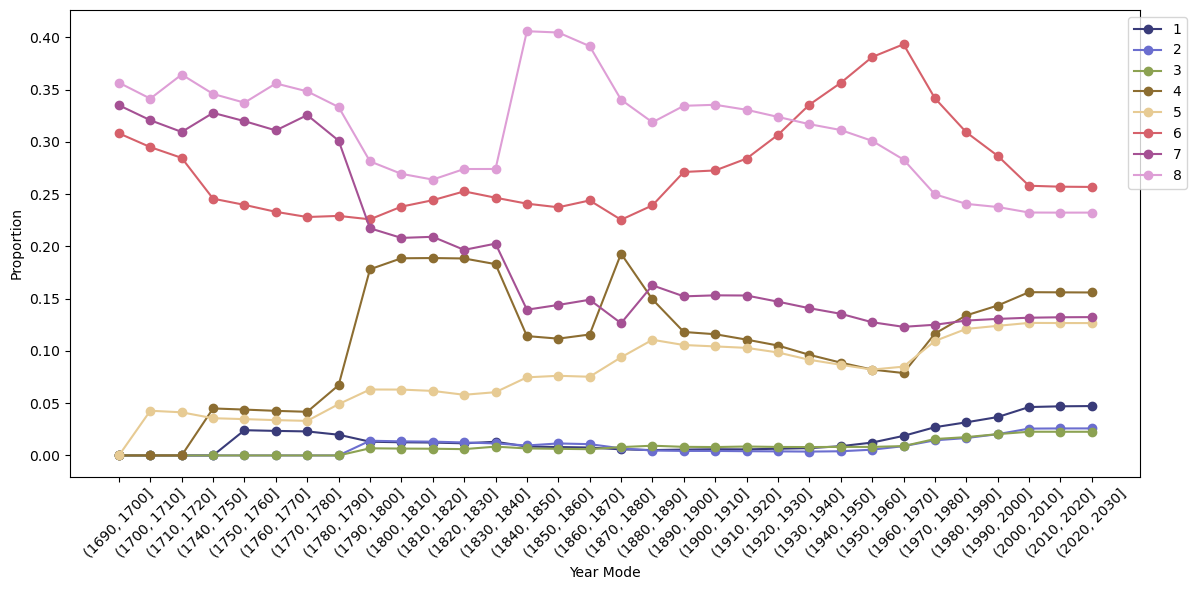

In [9]:
tools.line_plot(pivot3_cum)

In [5]:
morphometrics = [
    'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbSqu', 'ssbERI', 'ssbElo',
    'libNCo', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'stbSAl',
    'sdsLen', 'sssLin', 'ldsMSL', 'ldsRea', 'ldsAre', 'sisBpM', 'sdsSPW',
    'sdsSPO', 'sdsSWD', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo',
    'lddNDe', 'linWID', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'sddAre', 'midRea',
    'midAre', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre',
    'ltcWRB', 'sicCAR', 'sdsAre', 'mibCou', 'mibAre', 'mibLen', 'mibElo',
    'mibERI', 'mibCCo', 'mibLAL', 'mibFR', 'mibSCo', 'micBAD', 'midBAD',
    'limLPS', 'limAre'
]

In [6]:
pivot_df = morphotopes.groupby("year_mode")[morphometrics].median()
pivot_df

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
year_mode,,,,,,,,,,,,,,,,,,,,,
"(0, 1919]",-0.224870,-0.152944,-0.003262,-0.224013,0.051958,0.447815,-0.288644,-0.08234,-0.118711,-0.305109,...,-0.027872,-0.071259,-0.366181,-0.091642,-0.054849,-0.054849,-0.122367,-0.132329,0.149898,-0.111924
"(1919, 1948]",-0.617065,-0.637980,-0.003262,0.286279,-0.141472,0.455180,0.116931,-0.08234,-0.293188,0.081287,...,0.285328,0.356200,0.387618,-0.370509,-0.482644,-0.482644,-0.252336,-0.261806,0.149898,-0.345748
"(1948, 1978]",-0.402038,-0.390910,-0.003262,0.207341,-0.211678,0.451161,0.215711,-0.08234,-0.192355,-0.233554,...,0.215110,0.084602,0.055149,-0.215028,-0.107700,-0.107700,-0.164547,-0.205455,0.149898,-0.253513
"(1978, 1986]",-0.467616,-0.438374,-0.003262,0.189788,-0.259094,0.449754,0.473536,-0.08234,-0.167093,-0.233554,...,0.284143,0.009241,-0.021426,-0.179007,-0.008885,-0.008885,-0.166835,-0.221574,0.149898,-0.300032
"(1986, 1990]",-0.343293,-0.298471,-0.003262,-0.513067,-0.257949,0.431560,-0.945391,-0.08234,0.205333,-0.758289,...,-0.401006,-0.233663,-0.784264,0.381111,0.646673,0.646673,-0.156339,-0.160801,0.149898,-0.182659
"(1990, 1995]",-0.499624,-0.499598,-0.003262,0.658673,-0.243397,0.465237,0.482886,-0.08234,-0.229312,-0.233554,...,0.492942,0.195017,0.255975,-0.275035,-0.230385,-0.230385,-0.209169,-0.259822,0.149898,-0.351879
"(1995, 2000]",-0.535330,-0.558578,-0.003262,0.714049,-0.267537,0.468675,0.613800,-0.08234,-0.226398,-0.233554,...,0.518161,0.178507,0.181687,-0.270017,-0.212840,-0.212840,-0.242188,-0.283654,0.149898,-0.366539
"(2000, 2004]",-0.539703,-0.557784,-0.003262,0.493002,-0.290456,0.470103,0.412104,-0.08234,-0.183311,-0.758289,...,0.324425,-0.094247,-0.079799,-0.205319,-0.072903,-0.072903,-0.253064,-0.290360,0.149898,-0.343557
"(2004, 2008]",-0.493929,-0.506659,-0.003262,0.437695,-0.292203,0.471766,0.398557,-0.08234,-0.194766,-0.758289,...,0.329573,0.033716,0.019432,-0.228869,-0.071239,-0.071239,-0.258603,-0.294238,0.149898,-0.346768


In [14]:
morphotopes_centr = morphotopes.copy()
morphotopes_centr["geometry"] = morphotopes_centr.geometry.centroid
morphotopes_centr

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
21904_1448_1,POINT (4324444.717 3046458.523),False,1,2,5,8,13,27,55,46,...,0.328274,0.577102,0.986296,-0.495488,-0.556162,-0.556162,-0.279504,-0.302863,0.149898,-0.412607
21904_1448_0,POINT (4324326.073 3046375.647),False,1,2,5,8,13,27,55,43,...,0.413190,0.082534,0.056850,-0.289770,-0.133420,-0.133420,-0.297333,-0.326136,0.149898,-0.402454
29344_127_5,POINT (4325566.617 3048037.661),False,1,2,5,8,13,27,55,65,...,0.334524,0.055121,-0.054609,-0.298324,-0.488516,-0.488516,-0.290789,-0.347856,0.149898,-0.247026
29344_127_4,POINT (4325771.142 3048000.592),False,2,4,7,13,20,47,86,65,...,-0.415067,-0.492346,-0.435793,-0.120353,-0.109692,-0.109692,-0.304511,-0.328775,0.149898,-0.374307
29344_127_2,POINT (4325758.757 3047809.386),False,2,4,7,12,19,45,82,26,...,0.536643,0.639525,1.023649,-0.582218,-0.970502,-0.970502,-0.266122,-0.308485,0.149898,-0.448409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053_210_1,POINT (4330705.954 2774283.195),False,2,4,7,15,22,50,93,44,...,0.926680,-0.191337,0.004813,-0.245848,-0.375822,-0.375822,-0.219848,-0.278039,0.149898,-0.411868
25202_27_0,POINT (4329134.023 2738211.091),False,1,2,5,8,13,27,55,6,...,0.022814,0.448307,0.552433,-0.259511,-0.183660,-0.183660,-0.139684,0.176969,0.149898,-0.239562
18557_597_2,POINT (4329802.371 2733810.358),False,1,2,5,8,13,29,59,35,...,0.030304,0.538521,0.654447,-0.442478,-0.488701,-0.488701,-0.154609,-0.210868,0.149898,-0.294240


In [47]:
grid_size = 10_000

In [48]:
bds = morphotopes_centr.total_bounds
bds

array([4031805.4568017 , 2695174.21201325, 4671823.28985915,
       3547567.3189529 ])

In [49]:
x = np.arange(bds[0], bds[2], grid_size)
y = np.arange(bds[1], bds[3], grid_size)

In [50]:
xs, ys = np.meshgrid(x, y)

In [51]:
grid = gpd.GeoSeries.from_xy(x=xs.flatten(), y=ys.flatten(), crs=morphotopes_centr.crs).buffer(
    grid_size / 2, cap_style="square"
)

In [55]:
grid = grid.to_frame("geometry")

In [56]:
joined = morphotopes_centr.sjoin(grid, predicate="within")

In [25]:
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre,index_right
morphotope_id,,,,,,,,,,,,,,,,,,,,,
21904_1448_1,POINT (4324444.717 3046458.523),False,1,2,5,8,13,27,55,46,...,0.577102,0.986296,-0.495488,-0.556162,-0.556162,-0.279504,-0.302863,0.149898,-0.412607,376
21904_1448_0,POINT (4324326.073 3046375.647),False,1,2,5,8,13,27,55,43,...,0.082534,0.056850,-0.289770,-0.133420,-0.133420,-0.297333,-0.326136,0.149898,-0.402454,376
29344_127_5,POINT (4325566.617 3048037.661),False,1,2,5,8,13,27,55,65,...,0.055121,-0.054609,-0.298324,-0.488516,-0.488516,-0.290789,-0.347856,0.149898,-0.247026,376
29344_127_4,POINT (4325771.142 3048000.592),False,2,4,7,13,20,47,86,65,...,-0.492346,-0.435793,-0.120353,-0.109692,-0.109692,-0.304511,-0.328775,0.149898,-0.374307,376
29344_127_2,POINT (4325758.757 3047809.386),False,2,4,7,12,19,45,82,26,...,0.639525,1.023649,-0.582218,-0.970502,-0.970502,-0.266122,-0.308485,0.149898,-0.448409,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27053_210_1,POINT (4330705.954 2774283.195),False,2,4,7,15,22,50,93,44,...,-0.191337,0.004813,-0.245848,-0.375822,-0.375822,-0.219848,-0.278039,0.149898,-0.411868,90
25202_27_0,POINT (4329134.023 2738211.091),False,1,2,5,8,13,27,55,6,...,0.448307,0.552433,-0.259511,-0.183660,-0.183660,-0.139684,0.176969,0.149898,-0.239562,64
18557_597_2,POINT (4329802.371 2733810.358),False,1,2,5,8,13,29,59,35,...,0.538521,0.654447,-0.442478,-0.488701,-0.488701,-0.154609,-0.210868,0.149898,-0.294240,64


In [57]:
grid_counts = (
    joined.pivot_table(
        index=["index_right", "year_mode"],
        columns="level_3_label",
        values="num_buildings",
        aggfunc="sum",
        fill_value=0
    )
)
grid_counts

level_3_label               1   2    3    4    5  6     7   8
index_right year_mode                                        
31          (1948, 1978]  110   0  152   97  106  0  1411  84
95          (1948, 1978]    0   0   39    0   36  0     0   0
96          (1948, 1978]   74  19   20  259  890  0  1502   0
97          (1948, 1978]    0   0   25   17  307  0   198   0
102         (1919, 1948]    0   0   14    0    0  0     0   0
...                       ...  ..  ...  ...  ... ..   ...  ..
5543        (1948, 1978]    0   0    0   35   30  0    20   0
5544        (0, 1919]       0   0    0    1    0  0     0   0
            (1919, 1948]    0   0    0    0    0  0    15   4
            (1948, 1978]   11   0    0    5   13  0   117   0
            (1978, 1986]    0   0    0    0    0  0    20   0

[12511 rows x 8 columns]

In [58]:
grid_counts = grid_counts.reset_index()

In [59]:
grid_counts

level_3_label,index_right,year_mode,1,2,3,4,5,6,7,8
0,31,"(1948, 1978]",110,0,152,97,106,0,1411,84
1,95,"(1948, 1978]",0,0,39,0,36,0,0,0
2,96,"(1948, 1978]",74,19,20,259,890,0,1502,0
3,97,"(1948, 1978]",0,0,25,17,307,0,198,0
4,102,"(1919, 1948]",0,0,14,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12506,5543,"(1948, 1978]",0,0,0,35,30,0,20,0
12507,5544,"(0, 1919]",0,0,0,1,0,0,0,0
12508,5544,"(1919, 1948]",0,0,0,0,0,0,15,4
12509,5544,"(1948, 1978]",11,0,0,5,13,0,117,0


In [60]:
# If your grid is just a DataFrame with a geometry column
grid = gpd.GeoDataFrame(grid, geometry="geometry")

# Make sure index_right is a column
grid = grid.reset_index().rename(columns={"index": "index_right"})

In [61]:
merged = grid_counts.merge(
    grid[["index_right", "geometry"]],
    on="index_right",
    how="left"
)

In [62]:
merged

,index_right,year_mode,1,2,3,4,5,6,7,8,geometry
0,31,"(1948, 1978]",110,0,152,97,106,0,1411,84,"POLYGON ((4346805.457 2700174.212, 4346805.457..."
1,95,"(1948, 1978]",0,0,39,0,36,0,0,0,"POLYGON ((4336805.457 2710174.212, 4336805.457..."
2,96,"(1948, 1978]",74,19,20,259,890,0,1502,0,"POLYGON ((4346805.457 2710174.212, 4346805.457..."
3,97,"(1948, 1978]",0,0,25,17,307,0,198,0,"POLYGON ((4356805.457 2710174.212, 4356805.457..."
4,102,"(1919, 1948]",0,0,14,0,0,0,0,0,"POLYGON ((4406805.457 2710174.212, 4406805.457..."
...,...,...,...,...,...,...,...,...,...,...,...
12506,5543,"(1948, 1978]",0,0,0,35,30,0,20,0,"POLYGON ((4216805.457 3550174.212, 4216805.457..."
12507,5544,"(0, 1919]",0,0,0,1,0,0,0,0,"POLYGON ((4226805.457 3550174.212, 4226805.457..."
12508,5544,"(1919, 1948]",0,0,0,0,0,0,15,4,"POLYGON ((4226805.457 3550174.212, 4226805.457..."
12509,5544,"(1948, 1978]",11,0,0,5,13,0,117,0,"POLYGON ((4226805.457 3550174.212, 4226805.457..."


In [63]:
merged_gdf = gpd.GeoDataFrame(merged, geometry='geometry')
merged_gdf

,index_right,year_mode,1,2,3,4,5,6,7,8,geometry
0,31,"(1948, 1978]",110,0,152,97,106,0,1411,84,"POLYGON ((4346805.457 2700174.212, 4346805.457..."
1,95,"(1948, 1978]",0,0,39,0,36,0,0,0,"POLYGON ((4336805.457 2710174.212, 4336805.457..."
2,96,"(1948, 1978]",74,19,20,259,890,0,1502,0,"POLYGON ((4346805.457 2710174.212, 4346805.457..."
3,97,"(1948, 1978]",0,0,25,17,307,0,198,0,"POLYGON ((4356805.457 2710174.212, 4356805.457..."
4,102,"(1919, 1948]",0,0,14,0,0,0,0,0,"POLYGON ((4406805.457 2710174.212, 4406805.457..."
...,...,...,...,...,...,...,...,...,...,...,...
12506,5543,"(1948, 1978]",0,0,0,35,30,0,20,0,"POLYGON ((4216805.457 3550174.212, 4216805.457..."
12507,5544,"(0, 1919]",0,0,0,1,0,0,0,0,"POLYGON ((4226805.457 3550174.212, 4226805.457..."
12508,5544,"(1919, 1948]",0,0,0,0,0,0,15,4,"POLYGON ((4226805.457 3550174.212, 4226805.457..."
12509,5544,"(1948, 1978]",11,0,0,5,13,0,117,0,"POLYGON ((4226805.457 3550174.212, 4226805.457..."


<Axes: >

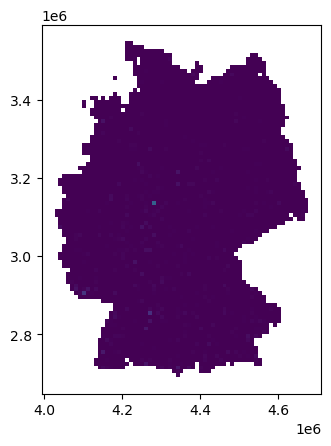

In [67]:
merged_gdf.plot(column = 1)

In [69]:
agg_cols = [i for i in range(1, 9)]

gdf_agg = merged_gdf.groupby(['index_right', 'geometry'])[agg_cols].sum().reset_index()
gdf_agg = gpd.GeoDataFrame(gdf_agg, geometry='geometry', crs=merged_gdf.crs)

gdf_agg

,index_right,geometry,1,2,3,4,5,6,7,8
0,31,"POLYGON ((4346805.457 2700174.212, 4346805.457...",110,0,152,97,106,0,1411,84
1,95,"POLYGON ((4336805.457 2710174.212, 4336805.457...",0,0,39,0,36,0,0,0
2,96,"POLYGON ((4346805.457 2710174.212, 4346805.457...",74,19,20,259,890,0,1502,0
3,97,"POLYGON ((4356805.457 2710174.212, 4356805.457...",0,0,25,17,307,0,198,0
4,102,"POLYGON ((4406805.457 2710174.212, 4406805.457...",56,0,86,209,356,35,3738,332
...,...,...,...,...,...,...,...,...,...,...
3771,5480,"POLYGON ((4236805.457 3540174.212, 4236805.457...",0,0,0,6,28,0,0,0
3772,5481,"POLYGON ((4246805.457 3540174.212, 4246805.457...",0,0,0,18,21,0,47,0
3773,5482,"POLYGON ((4256805.457 3540174.212, 4256805.457...",12,0,0,0,25,0,237,0
3774,5543,"POLYGON ((4216805.457 3550174.212, 4216805.457...",0,0,0,35,30,0,20,0


In [83]:
gdf_agg['total_count'] = gdf_agg[agg_cols].sum(axis=1)
for col in agg_cols:
    gdf_agg[f'{col}_pct'] = gdf_agg[col] / gdf_agg['total_count'] * 100

In [84]:
gdf_agg

,index_right,geometry,1,2,3,4,5,6,7,8,total_count,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct
0,31,"POLYGON ((4346805.457 2700174.212, 4346805.457...",110,0,152,97,106,0,1411,84,1960,5.612245,0.00000,7.755102,4.948980,5.408163,0.000000,71.989796,4.285714
1,95,"POLYGON ((4336805.457 2710174.212, 4336805.457...",0,0,39,0,36,0,0,0,75,0.000000,0.00000,52.000000,0.000000,48.000000,0.000000,0.000000,0.000000
2,96,"POLYGON ((4346805.457 2710174.212, 4346805.457...",74,19,20,259,890,0,1502,0,2764,2.677279,0.68741,0.723589,9.370478,32.199711,0.000000,54.341534,0.000000
3,97,"POLYGON ((4356805.457 2710174.212, 4356805.457...",0,0,25,17,307,0,198,0,547,0.000000,0.00000,4.570384,3.107861,56.124314,0.000000,36.197441,0.000000
4,102,"POLYGON ((4406805.457 2710174.212, 4406805.457...",56,0,86,209,356,35,3738,332,4812,1.163757,0.00000,1.787199,4.343308,7.398171,0.727348,77.680798,6.899418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,5480,"POLYGON ((4236805.457 3540174.212, 4236805.457...",0,0,0,6,28,0,0,0,34,0.000000,0.00000,0.000000,17.647059,82.352941,0.000000,0.000000,0.000000
3772,5481,"POLYGON ((4246805.457 3540174.212, 4246805.457...",0,0,0,18,21,0,47,0,86,0.000000,0.00000,0.000000,20.930233,24.418605,0.000000,54.651163,0.000000
3773,5482,"POLYGON ((4256805.457 3540174.212, 4256805.457...",12,0,0,0,25,0,237,0,274,4.379562,0.00000,0.000000,0.000000,9.124088,0.000000,86.496350,0.000000
3774,5543,"POLYGON ((4216805.457 3550174.212, 4216805.457...",0,0,0,35,30,0,20,0,85,0.000000,0.00000,0.000000,41.176471,35.294118,0.000000,23.529412,0.000000


<Axes: >

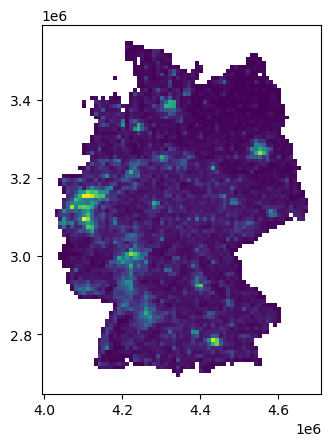

In [86]:
gdf_agg.plot(column = "total_count")

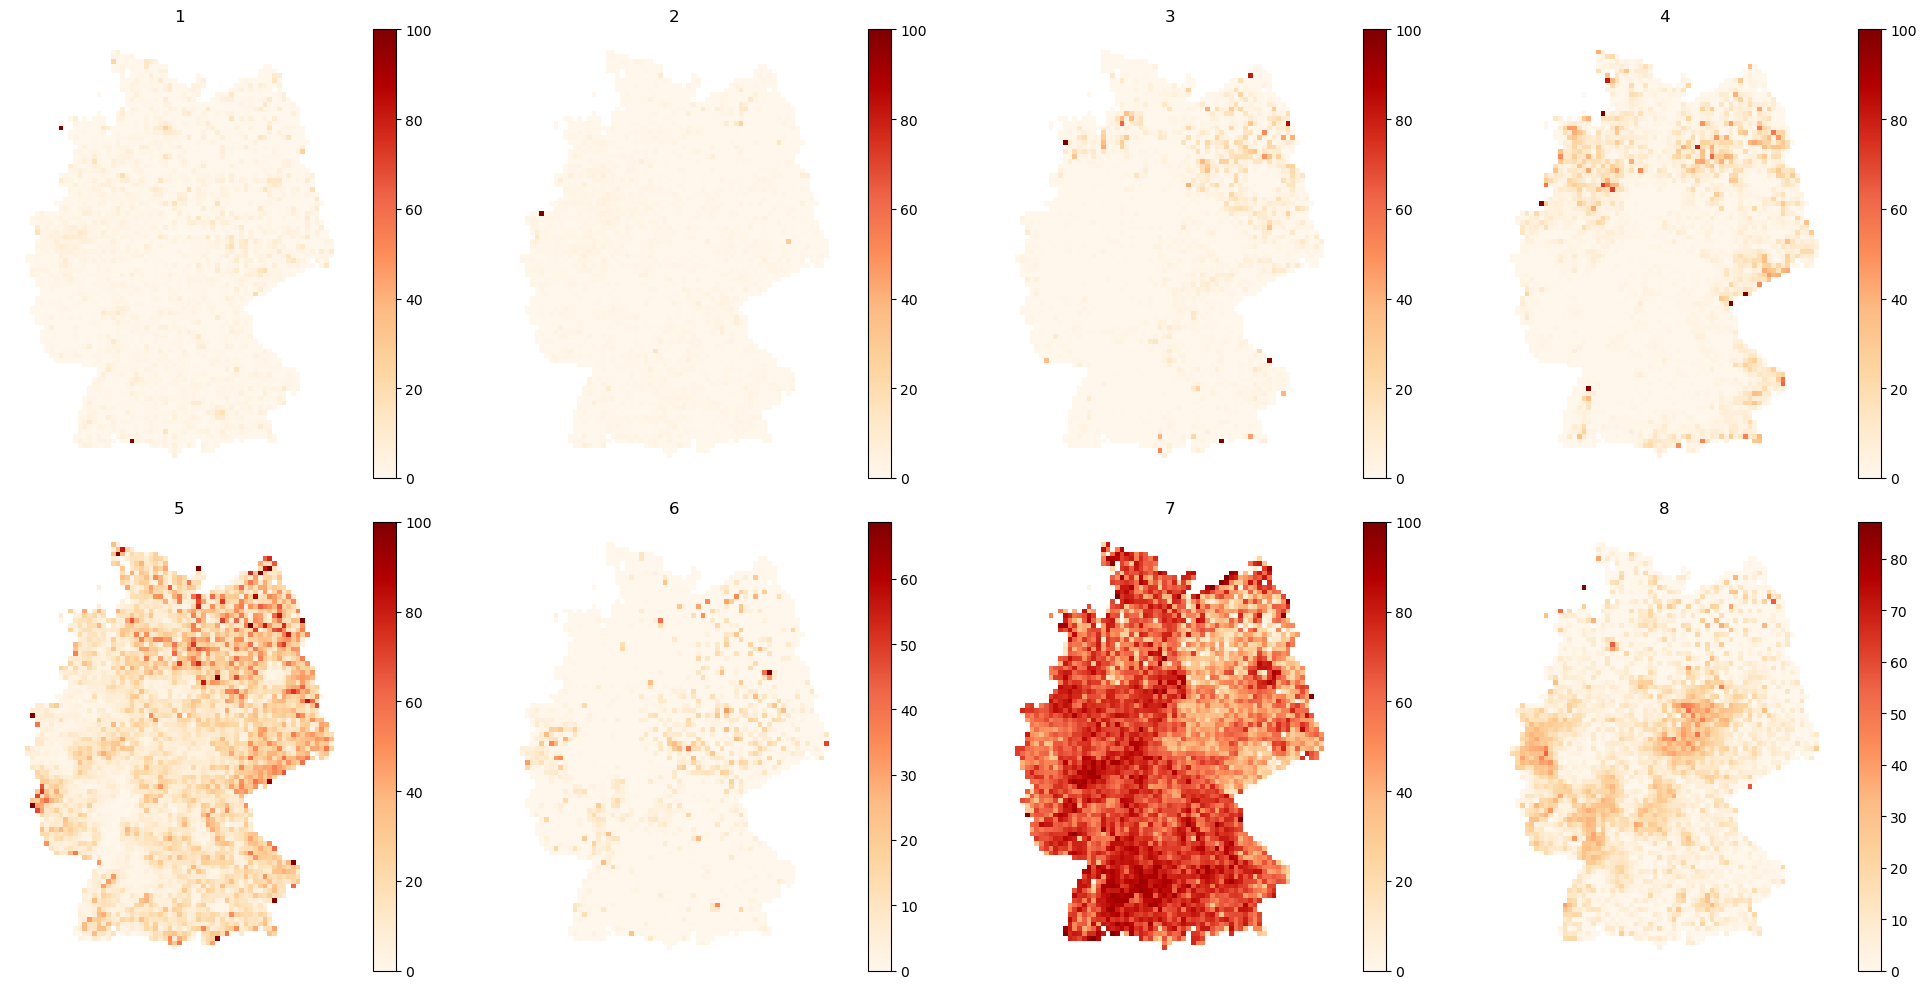

In [87]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows x 4 columns
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through columns and plot each
for i, col in enumerate(agg_cols):
    gdf_agg.plot(
        column=f"{col}_pct",
        cmap='OrRd',
        legend=True,
        ax=axes[i]
    )
    axes[i].set_title(f'{col}')
    axes[i].axis('off')

plt.tight_layout()